# Data Preparation

Disini kita akan mengimport dataset ke dalam kode kita. Tidak hanya itu, dalam data preparation kita akan mempertimbangkan untuk menghapus kolom, menentukan kolom yang benar benar diperlukan dalam kasus ini. Begitu pula untuk cleaning data, seperti penanganan apakah terdapat data yang kosong, data yang berbeda atau keluar dari ukuran aslinya (outlier), dan data yang terduplikasi. Beberapa masalah pada data tersebut dapat membuat proses pembelajaran / training mesin kita menjadi terganggu dan hasilnya kurang akurat.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
# mengakses file data csv
df = pd.read_csv("iris.csv")

# melihat sebagian data
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [42]:
# melihat informasi type data dan variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [43]:
# menyiapkan variable sebelumnya agar bisa divisualisasikan ke depannya
pure_data = df.copy()

# menghilangkan atribut yang tidak dibutuhkan
df.drop(columns=["Id", "SepalWidthCm", "PetalLengthCm"], inplace=True)
df.head() # mleihat data setelah diubah

# menyimpan perubahan agar dapat ditampilkan
selected_data = df.head()

Lalu selanjutnya akan dilakukan pencarian data apakah terdapat outlier atau tidak dengan cara melihatnya dengan boxplot

<Axes: ylabel='SepalLengthCm'>

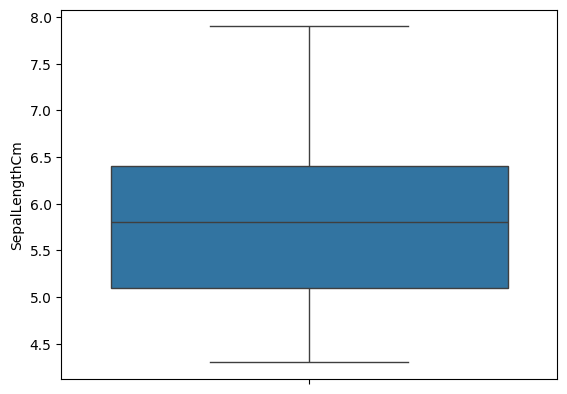

In [44]:
sns.boxplot(df["SepalLengthCm"])

<Axes: ylabel='PetalWidthCm'>

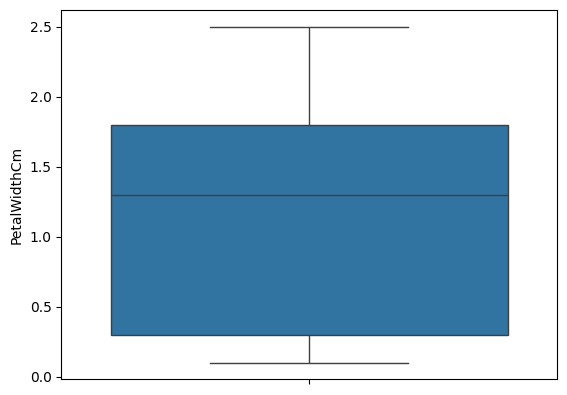

In [45]:
sns.boxplot(df["PetalWidthCm"])

berhubungan dalam data tidak terdapat outlier maka tidak ada yang perlu dihapus. Ciri outlier maka akan terdapat titik titik di bawah dan di atas box nya.

dalam proses preparation data juga diperlukan untuk melihat apakah ada data yang hilang nilainya

In [46]:
# melihat apakah terdapat data yang kosong
df.isna().sum()

SepalLengthCm    0
PetalWidthCm     0
dtype: int64

In [47]:
# melihat apakah ada data kosong
df.isnull().sum()

SepalLengthCm    0
PetalWidthCm     0
dtype: int64

perlu dipertimbangkan juga untuk melihat apakah ada data yang terduplikasi atau tidak

In [48]:
# mengecek duplikasi
df[df.duplicated()]

,SepalLengthCm,PetalWidthCm
7,5.0,0.2
16,5.4,0.4
19,5.1,0.3
20,5.4,0.2
22,4.6,0.2
24,4.8,0.2
25,5.0,0.2
28,5.2,0.2
29,4.7,0.2
30,4.8,0.2


# Data Preprocessing

Dalam tahapan ini kita perlu menyiapkan agar data lebih mudah dipahami dan dimengerti oleh komputer. Selain itu, tujuan data preprocessing adalah membuat setiap variable dapat berkontribusi perhitungan yang sama dengan variable yang lain.

In [49]:
# normalisasi data (mengubah value masing2 data menjadi 0-1)
for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# menyimpan perubahan agar dapat digunakan
normalize_data = df.head()

df.head() # melihat data lagi

,SepalLengthCm,PetalWidthCm
0,0.222222,0.041667
1,0.166667,0.041667
2,0.111111,0.041667
3,0.083333,0.041667
4,0.194444,0.041667


# Data Training

pada tahapan data training ini, data sudah siap untuk diolah. Dalam proses ini mesin akan memahami data dan berdasarkan algoritma yang dibuat. Pada tahapan ini mesin akan mencoba memisahkan data berdasarkan pola kedekatan atribut sehingga dapat membuat grup / cluster. Setiap cluster itu memiliki karakteristik yang berbeda beda dan unik.

In [50]:
# membuat kelas / template untuk kmeans
class Kmeans():
    def __init__(self, n_cluster=2, max_iteration=100):
        # jumlah kluster
        self.n_cluster = n_cluster 
        # maksimal iterasi pada training
        self.max_iteration = max_iteration 
        # pusat kluster
        self.centroid = None 
        # untuk hasil label cluster
        self.label = None   
        # untuk perhitungan error wcss
        self.inertia = 0 

    def fit(self, x):
        # mencari pusat cluster secara random
        self.centroid = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))

        # melakukan perulangan dan iterasi
        for iteration in range(self.max_iteration):
            # mereset kembali isi label
            self.label = []
            # mereset jarak cluster terdekat
            distances_cluster = []

            # menghitung jarak pada setiap item
            for item in x:
                # menghitung jarak centroid dengan setiap item
                distance = np.sqrt(np.sum((item - self.centroid)**2, axis=1))
                distances_cluster.append(distance.min()) # menyimpan untuk menyimpan jarak terkecil
                cluster = np.argmin(distance) # mencari label cluster
                self.label.append(cluster)
            
            # menyiapkan array untuk memisahkan grup
            groups = []

            # merubahnya ke matriks numpy agar bisa diperhitungkan 
            distances_cluster = np.array(distances_cluster)
            self.label = np.array(self.label)

            # melakukan pemisahan antar cluster dengan menyimpan banyak baris yang beda
            for i in range(self.n_cluster):
                groups.append(np.argwhere(self.label == i))

            new_centroid = []
            sum_distance = []

            # untuk setiap group / cluster akan dilakukan pengecekan 
            for i, indices in enumerate(groups):
                if len(indices) == 0: # jika group sudah tak punya member gunakan centroid sebelumny
                    new_centroid.append(self.centroid[i]) 
                else:
                    # menghitung jarak error
                    sum_distance.append(np.sum(distances_cluster)**2)
                    # centroid akan berubah sesuai dengan rata rata data
                    new_centroid.append(np.mean(x[indices], axis=0)[0])
            
            # melihat rata rata error
            self.inertia = np.mean(sum_distance)

            # jika perubahan centroid antara iterasi ini dengan iterasi seblumnya sudah 
            # tidak banyak berubah maka hentikan
            if np.max(np.abs(np.array(new_centroid) - self.centroid)) < 0.0001:
                break
            else:
                # jika tidak maka update centroid baru
                self.centroid = np.array(new_centroid)

    def predict(self, x ):
        x = np.array(x) # agar dapat dilakukan proses matematika
        # menghitung jarak centroid dengan setiap item
        distance = np.sqrt(np.sum((x - self.centroid)**2))
        return np.argmin(distance) # menghitung label cluster


# Evaluasi

dalam tahapan ini kita akan mencari tau jumlah k yang optimal dengan menggunakan elbow method analisis, kita mampu menemukan jumlah k yang baik. Metode ini mencari penurunan paling kecil dan selisih nya besar dari k yang sebelumnya.

In [51]:
# menyiapkan wcss yang dapat disimpan
wcss = []

# akan mencoba nilai k mulai dari 1-10 dan disimpan di list
for k in range(1, 11):
    kmean = Kmeans(n_cluster=k)
    kmean.fit(df.to_numpy())
    wcss.append(kmean.inertia)

Text(0, 0.5, 'wcss')

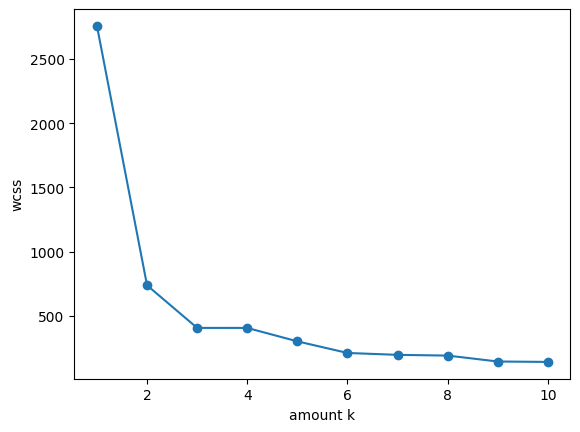

In [53]:
# menampilkan grafik elbow agar dapat menemukan jumlah k yang baik
plt.plot(np.arange(1, 11), wcss, marker="o")
plt.xlabel("amount k")
plt.ylabel("wcss")

dengan melihat dari elbow di atas kita dapat menentukan jumlah k yang optimal adalah pada jumlah k = 3 karena penurunannya sudah tidak signifikat ketika k=4

In [54]:
# menentukan jumlah k dan mentraining model
model = Kmeans(n_cluster=3)
model.fit(df.to_numpy())

In [55]:
# melihat centroid atau pusat cluster yang ada
model.centroid

array([[0.45951036, 0.55720339],
       [0.19549266, 0.07783019],
       [0.70614035, 0.83333333]])

Text(0, 0.5, 'SepalLength')

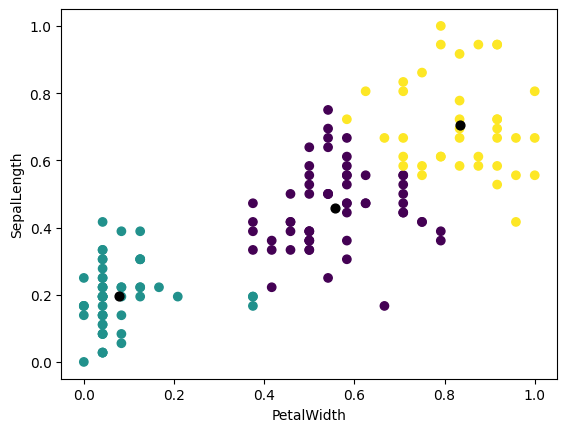

In [67]:
cnter = pd.DataFrame(columns=df.columns, data=model.centroid)

# menampilkan hasil scatter item dengan model yang ada
plt.scatter(x=df["PetalWidthCm"], y=df["SepalLengthCm"], c=model.label)
# melihat dari titik pusat kluster
plt.scatter(x=cnter["PetalWidthCm"], y=cnter["SepalLengthCm"], s=40, c="black")
plt.xlabel("PetalWidth")
plt.ylabel("SepalLength")

In [ ]:
df.iloc[88]

SepalLengthCm    0.361111
PetalWidthCm     0.500000
Name: 88, dtype: float64

untuk mengetahui apakah model sudah dapat diprediksi atau belum bisa

In [64]:
model.predict([0.361111, 0.5])

0